## Importing Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from datetime import datetime

##### Initial Shape of Data

In [2]:
df = pd.read_excel('/Users/roshan/Downloads/PVADATA.xlsx', sheet_name = 'Raw Data_06.26.23');
df.shape

(893, 85)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 85 columns):
 #   Column                                                                                                                                                                                                                                                           Non-Null Count  Dtype         
---  ------                                                                                                                                                                                                                                                           --------------  -----         
 0   HMIS ID                                                                                                                                                                                                                                                          893 non-null    int64         
 1   Start Date 

In [4]:
df.dropna(axis = 1, how="all", inplace=True); #dropping columns that have all null entries

In [5]:
df.shape #shape after dropping the columns

(893, 78)

##### Check for Duplicate Entries

In [6]:
columns = df.columns

In [7]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,HMIS ID,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,...,HBP Flag,Scored Score,Final Score,Rapid Resolution Flag,Homeless Score: 1,Household Score: 2,Health Score: 3,LOT Score: 4,Risks Score: 5,PVA Priority Score


#### Getting Columns with at least one Null Value

In [8]:
missing_values = df.isna().any()
cols_at_least_one_null = []
for column, has_missing_values in missing_values.items():
    if has_missing_values:
      cols_at_least_one_null.append(column)
cols_at_least_one_null = pd.Series(cols_at_least_one_null)

#### Number of Null Values

In [9]:
#Creating a series object for column name and the number of null value present in that column
num_null_values = pd.Series({i: df[i].isna().sum() for i in cols_at_least_one_null})

# Convert the Series to DataFrame
null_values_df = pd.DataFrame({'Column Name': num_null_values.index, 'Null Count': num_null_values.values})

print("Number of null values in each column:")
print(null_values_df)


Number of null values in each column:
                                          Column Name  Null Count
0                                   Location Latitude          36
1                                  Location Longitude          36
2   Case manager completing Place Value assessment...         216
3   Case manager completing Place Value assessment...         839
4                          Case Manager Email Address         256
5   In the past three years have you spent one or ...         786
6   In the past three years have you spent one or ...         858
7   In the past three years have you spent one or ...         862
8                                          LOT Med 90         891
9                                  LOT Corrections 90         891
10                                Homeless before med         892
11                        Homeless before corrections         892
12                           Living Situation Details         791
13  Including yourself, how many peopl

#### Dropping Columns

> Here, we are dropping the columns that are irrelevant in our analysis.
> For the scores columns, in accordance to the suggestion from our partner, we are keeping the final scores only.

In [10]:
df.drop(['Location Latitude',
         'Location Longitude',
         'HMIS ID',
         'Start Date',
         'End Date',
         'Response Type',
         'IP Address',
         'Progress',
         'Duration (in seconds)',
         'Finished',
         'Recorded Date',
         'Response ID',
         'Distribution Channel',
         'User Language',
         'Consent',
         'Case manager completing Place Value assessment - Selected Choice',
         'Case manager completing Place Value assessment - Other - Text',
         'Case Manager Email Address',
         'Homeless before med',
         'Living Situation Details',
         'Homeless before corrections',
         'Confirm',
         'Embedded Household Score',
         'Score',
         'Scored Score',], axis = 1, inplace = True)

In [11]:
df.shape

(893, 53)

In [12]:
df.head()

,Have you attempted Diversion / Rapid Resolution / Problem Solving with your client?,County,DOB,What is your race?,Do you identify as Hispanic or Latino?,How do you identify your gender?,Living Situation,"In the past three years have you spent one or more nights in your car, in a tent, abandoned building, bus or train station or other place not meant for habitation because you did not have your own housing?","In the past three years have you spent one or more nights in an emergency shelter such as Chattanooga Rescue Mission, Cleveland Emergency Shelter, Maclellan Shelter for Families, Chatt Foundation Cold Weather Shelter , or a hotel rooms paid for by a socia","In the past three years have you spent one or more nights in Transitional Housing such as Chattanooga Room in the Inn, Family Promise, Foundation House Ministries?",...,Potential Veteran,HBP Flag,Final Score,Rapid Resolution Flag,Homeless Score: 1,Household Score: 2,Health Score: 3,LOT Score: 4,Risks Score: 5,PVA Priority Score
0,Yes,Hamilton,1998-10-13,Black or African American,Non Hispanic / Non Latino,FEMALE,"Outdoors, car, vacant building, or other unshe...",NaN,NaN,NaN,...,NaN,NaN,15112.0,NaN,1,5,1,1,2,11215
1,Yes,Hamilton,1985-01-24,Black or African American,Non Hispanic / Non Latino,MALE,Hotel or temporary rental requiring ongoing pa...,"Yes, I've spent one or more nights in a place ...",NaN,NaN,...,NaN,HBP and High Health,2484.0,NaN,2,4,8,4,0,48024
2,Yes,Hamilton,1983-02-06,Black or African American,Non Hispanic / Non Latino,FEMALE,"Outdoors, car, vacant building, or other unshe...",NaN,NaN,NaN,...,NaN,HBP and High Health,13423.0,NaN,1,3,4,2,3,24313
3,Yes,Hamilton,1981-09-10,Black or African American,Non Hispanic / Non Latino,FEMALE,Emergency shelter (including hotel paid for by...,NaN,NaN,NaN,...,NaN,HBP and High Health,13412.0,NaN,1,3,4,1,2,14213
4,Yes,Hamilton,1996-11-07,Black or African American,Non Hispanic / Non Latino,FEMALE,Emergency shelter (including hotel paid for by...,NaN,NaN,NaN,...,NaN,NaN,14515.0,NaN,1,4,5,1,5,15514


### Feature Engineering

In [13]:
def replace_columns(df, old_colm, new_colm, new_values: list ):
  df.rename(columns={old_colm: new_colm}, inplace=True)
  df[new_colm] = new_values


In [14]:
# Converting the DOB Date of Birth columns to Age
date_of_birth_list = df['DOB']

# Get the current date
current_date = datetime.now()

# Create an empty list to store the ages
age_list = []

# Calculate age for each date of birth
for dob in date_of_birth_list:
    dob = str(dob)
    # Convert the date of birth string to a datetime object
    dob_date = datetime.strptime(dob, '%Y-%m-%d %H:%M:%S')

    # Calculate the difference between current date and date of birth
    age = (current_date - dob_date).days // 365

    # Append the age to the age list
    age_list.append(age)

replace_columns(df, 'DOB', 'Age', age_list)

> We notice that, for the gender column, the dataset has two skip options. Therefore, we are merging the two options into one below.


In [15]:
gender_col_entries = df['How do you identify your gender?']
two_skips_merged = []
for val in gender_col_entries:
  if val == 'skip':
    val = 'Skip this question'
  two_skips_merged.append(val)

df['How do you identify your gender?'] = two_skips_merged

## DATA DISTRIBUTION

In [16]:
df._get_numeric_data().columns

Index(['Age', 'Including yourself, how many people are in your household?',
       'Final Score', 'Homeless Score: 1', 'Household Score:  2',
       'Health Score:  3', 'LOT Score:  4', 'Risks Score:  5',
       'PVA Priority Score'],
      dtype='object')

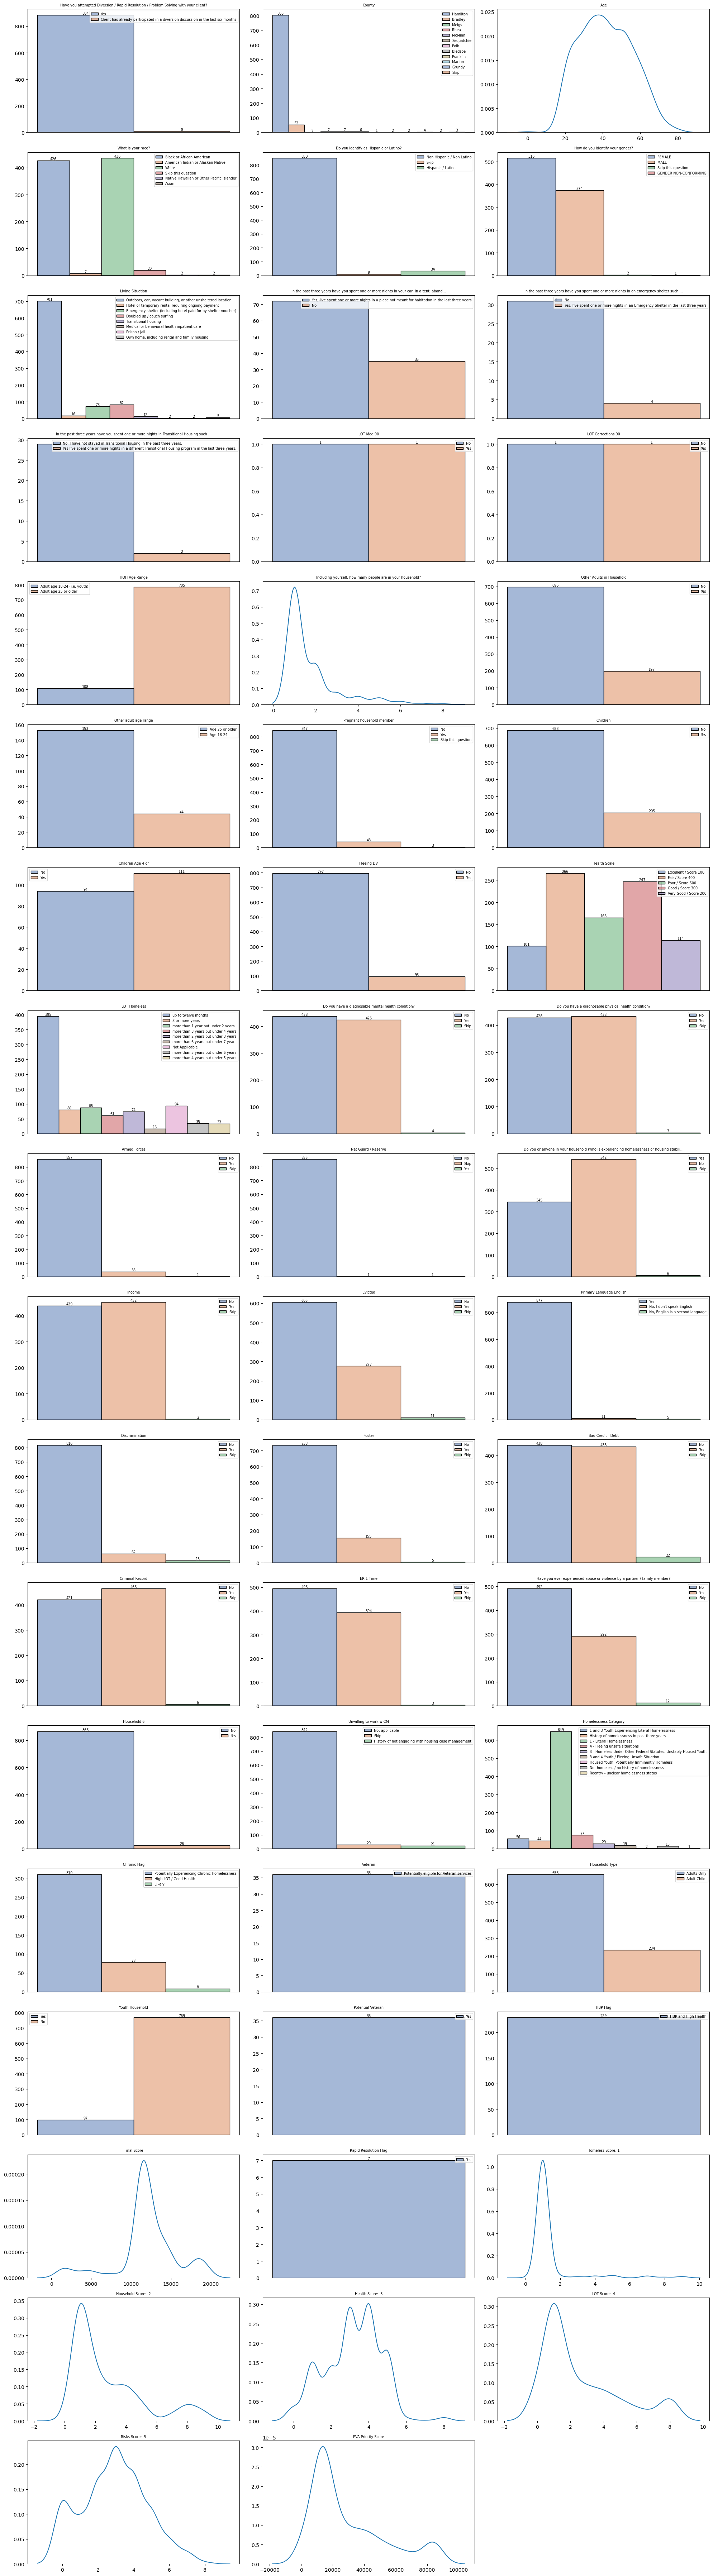

In [17]:
class Plotter:
    """
    Base class for creating plotter objects.

    Parameters:
        df (DataFrame): The input DataFrame to plot.
        num_cols (int): Number of columns for the subplot grid.
    """

    def __init__(self, df, num_cols=3):
        """
        Initializes a Plotter object.

        Args:
            df (DataFrame): The input DataFrame to plot.
            num_cols (int): Number of columns for the subplot grid.
        """
        self.df = df
        self.num_cols = num_cols
        self.num_plots = len(df.columns) if df is not None else 0
        self.num_rows = math.ceil(self.num_plots / self.num_cols)

    # Function to truncate column names
    @staticmethod
    def truncate_string(text, max_length):
        return text[:max_length-3] + "..." if len(text) > max_length else text

    def plot_plots(self):
        """
        Plots the subplots of the DataFrame columns.

        """
        if self.num_plots == 0:
            print("No data to plot.")
            return

        # Create the subplots grid
        fig, axes = plt.subplots(self.num_rows, self.num_cols, figsize=(20, 4*self.num_rows))

        # Flatten the axes array
        axes = axes.flatten()

        # Loop through each column
        for i, column in enumerate(self.df.columns):
            numeric_column_list = self.df._get_numeric_data().columns
            if column in numeric_column_list:
              self.kdeplot(column, axes[i])
            else:
              self.histplot(column, axes[i])

        # Remove any extra subplots
        for j in range(self.num_plots, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()

        # Display the plot
        plt.show()

    def histplot(self, column, ax, palette_='deep', order_='ascending'):
        """
        Plots a histogram for a single column.

        Args:
            column (str): The name of the column to plot.
            ax (Axes): The matplotlib Axes object for the subplot.
        """
        # Set the title font size
        ax.set_title(Plotter.truncate_string(column, 90), fontsize='x-small')

        # Create the distribution plot
        plot = sns.histplot(data=self.df, x=column, hue=column, ax=ax, palette=palette_,)

        # Remove x-axis label and y-axis label
        plot.set(xlabel=None)
        plot.set(ylabel=None)

        # Remove x-ticks
        plot.set(xticks=[])

        # Remove the title from the legend
        plot.legend_.set_title('')

        # Add count on top of each bar
        for rect in plot.patches:
            height = rect.get_height()
            if height > 0:
                plot.text(rect.get_x() + rect.get_width() / 2, height,
                          height, ha='center', va='bottom', fontsize='x-small')


    # TODO: label the axes, put the ticks and and show the distribution.
    def kdeplot(self, column, ax):
        """
        Plots a kernel density estimation plot for a single column.

        Args:
            column (str): The name of the column to plot.
            ax (Axes): The matplotlib Axes object for the subplot.
        """
        # Set the title font size
        ax.set_title(Plotter.truncate_string(column, 90), fontsize='x-small')

        # Create the distribution plot
        plot = sns.kdeplot(self.df[column], ax=ax)

        # Remove x-axis label and y-axis label
        plot.set(xlabel=None)
        plot.set(ylabel=None)

# Set the title size to a minimum
plt.rcParams['axes.titlesize'] = 'x-small'

# Set the legend's font size to a minimum
plt.rcParams['legend.fontsize'] = 'x-small'

# Example usage
# df = ...  # Provide your DataFrame
plotter = Plotter(df, num_cols=3)
plotter.plot_plots()


## Demographics Analysis

Q. Does the PVA dataset cover the diverse range of unsheltered population in SETN ?

**TODO: include why part later**

We are grouping our dataset into 4 parts according to race and sex:
> 1. White Male
> 1. White Female
> 1. BIPOC Male
> 1. BIPOC Female


In [18]:
columns_mapping = {
    'Have you attempted Diversion / Rapid Resolution / Problem Solving with your client?': 'diversion_attempt?',
    'County': 'county',
    'Age': 'age',
    'What is your race?': 'race',
    'Do you identify as Hispanic or Latino?': 'hispanic/latino?',
    'How do you identify your gender?': 'gender',
    'Living Situation': 'living_situation',
    'In the past three years have you spent one or more nights in your car, in a tent, abandoned building, bus or train station or other place not meant for habitation because you did not have your own housing?': 'lived_in_uninhabitable_place?',
    'In the past three years have you spent one or more nights in an emergency shelter such as Chattanooga Rescue Mission, Cleveland Emergency Shelter, Maclellan Shelter for Families, Chatt Foundation Cold Weather Shelter , or a hotel rooms paid for by a socia': 'lived_in_emergency_shelter?',
    'In the past three years have you spent one or more nights in Transitional Housing such as Chattanooga Room in the Inn, Family Promise, Foundation House Ministries?': 'lived_in_transitional_housing?',
    'LOT Med 90': 'LOT_med_90',
    'Homeless before med': 'homeless_before_med',
    'HOH Age Range': 'HOH_age_range',
    'Living Situation Details': 'living_situation',
    'Including yourself, how many people are in your household?': 'household_size',
    'Other Adults in Household': 'other_adults_in_household?',
    'Other adult age range': 'other_adults_age',
    'Pregnant household member': 'pregnant_member?',
    'Children': 'children?',
    'Children Age 4 or': 'children_age_4_or_under?',
    'Fleeing DV': 'fleeing_dv?',
    'Health Scale': 'health_scale',
    'LOT Homeless': 'lot_homeless',
    'Do you have a diagnosable mental health condition?': 'mental_health_condition?',
    'Do you have a diagnosable physical health condition?': 'phyisical_health_condition?',
    'Armed Forces': 'armed_forces?',
    'Nat Guard / Reserve': 'nat_guard/reserve?',
    'Do you or anyone in your household (who is experiencing homelessness or housing stability with you) have high blood pressure?': 'high_bp_household?',
    'Income': 'income',
    'Evicted': 'evicted?',
    'Primary Language English': 'primary_language_eng',
    'Discrimination': 'discrimination?',
    'Foster': 'foster?',
    'Bad Credit - Debt': 'debt?',
    'Criminal Record': 'criminal_record?',
    'ER 1 Time': 'er_time',
    'Have you ever experienced abuse or violence by a partner / family member?': 'dv_parter_family?',
    'Household 6': 'household_6',
    'Unwilling to work w CM': 'unwilling_work_cm?',
    'Confirm': 'confirm',
    'Embedded Household Score': 'embed_household_score',
    'Homelessness Category': 'homelessness_category',
    'Chronic Flag': 'chronic_flag',
    'Veteran': 'veteran',
    'Household Type': 'type_household',
    'Youth Household': 'youth_household',
    'Potential Veteran': 'potential_veteran',
    'HBP Flag': 'hbp_flag',
    'Final Score': 'final_score',
    'Rapid Resolution Flag': 'rapid_res_flag'
}


In [19]:
#Since we have already removed certain columns from our df, we need to create a new dictionary with keys as columns that are currently present in the df
# def new_map(df: pd.DataFrame, columns_mapping: dict) -> dict:
#   new_mapping = {}
#   for col in df.columns:
#     if col in columns_mapping.keys():
#       new_mapping[col] = columns_mapping.get(col)
#   return new_mapping

#just realised that the rename function does all that : )

df.rename(columns=columns_mapping, inplace=True)


In [20]:
df.columns

Index(['diversion_attempt?', 'county', 'age', 'race', 'hispanic/latino?',
       'gender', 'living_situation', 'lived_in_uninhabitable_place?',
       'lived_in_emergency_shelter?', 'lived_in_transitional_housing?',
       'LOT_med_90', 'LOT Corrections 90', 'HOH_age_range', 'household_size',
       'other_adults_in_household?', 'other_adults_age', 'pregnant_member?',
       'children?', 'children_age_4_or_under?', 'fleeing_dv?', 'health_scale',
       'lot_homeless', 'mental_health_condition?',
       'phyisical_health_condition?', 'armed_forces?', 'nat_guard/reserve?',
       'high_bp_household?', 'income', 'evicted?', 'primary_language_eng',
       'discrimination?', 'foster?', 'debt?', 'criminal_record?', 'er_time',
       'dv_parter_family?', 'household_6', 'unwilling_work_cm?',
       'homelessness_category', 'chronic_flag', 'veteran', 'type_household',
       'youth_household', 'potential_veteran', 'hbp_flag', 'final_score',
       'rapid_res_flag', 'Homeless Score: 1', 'Househo

We have selected four columns in our dataset that represent the demographics of the population to compare it with the population statistics in the PiT

> age, race, hispanic/latino, gender

In [21]:
demographics_cols = ['age', 'race', 'hispanic/latino?', 'gender']

In [22]:
df['race'].unique()

array(['Black or African American', 'American Indian or Alaskan Native',
       'White', 'Skip this question',
       'Native Hawaiian or Other Pacific Islander', 'Asian'], dtype=object)

In [23]:
df['hispanic/latino?'].unique()

array(['Non Hispanic / Non Latino', 'Skip', 'Hispanic / Latino'],
      dtype=object)

In [24]:
df[df['hispanic/latino?'] == 'Hispanic / Latino']['hispanic/latino?'].count()

34

In [25]:
df['race'].unique()

array(['Black or African American', 'American Indian or Alaskan Native',
       'White', 'Skip this question',
       'Native Hawaiian or Other Pacific Islander', 'Asian'], dtype=object)

In [26]:
df['gender'].unique()

array(['FEMALE', 'MALE', 'Skip this question', 'GENDER NON-CONFORMING'],
      dtype=object)

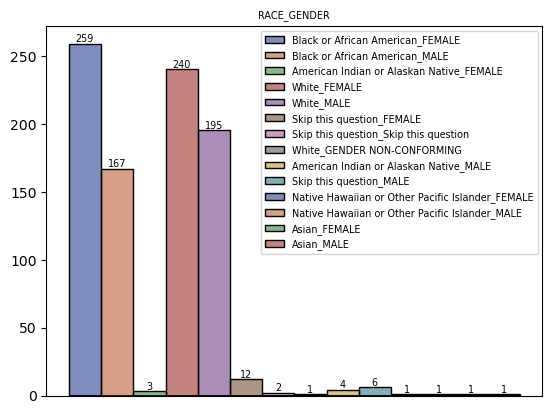

In [27]:
demo = pd.DataFrame()
demo['RACE_GENDER'] = df['race'].astype(str) + '_' + df['gender'].astype(str)

plot = Plotter(demo, num_cols=1)
plot.histplot('RACE_GENDER', plt.subplot(111), 'dark')

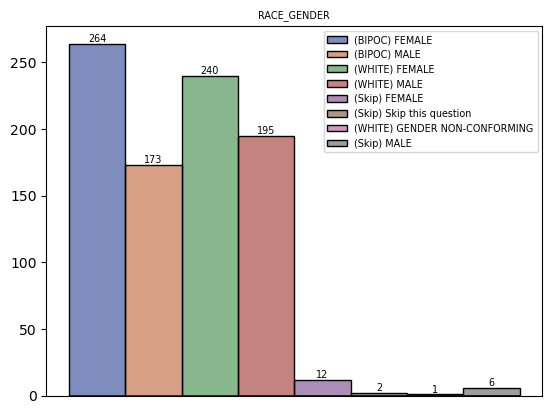

In [28]:
def final_map(row):
    gender = row['gender']
    race = row['race']
    if race in ['Black or African American', 'American Indian or Alaskan Native', 'Native Hawaiian or Other Pacific Islander', 'Asian']:
        return '(BIPOC) ' + gender
    elif race == 'White':
        return '(WHITE) ' + gender
    else:
        return '(Skip) ' + gender

demo1 = pd.DataFrame()
demo1['RACE_GENDER'] = df.apply(final_map, axis=1)


plot = Plotter(demo1, num_cols=1)
plot.histplot('RACE_GENDER', plt.subplot(111), 'dark')

In [29]:
dict = {
    'county': {
        'Hamilton': 1,
        'Bradley': 2,
        'Sequatchie': 3,
        'McMinn': 4,
        'Franklin': 5,
        'Marion': 6,
        'Rhea': 7,
        'Polk': 8,
        'Meigs': 9,
        'Grundy': 10,
        'Bledsoe': 11,
        'Skip': 12
    },
    'hispanic/latino?': {
        'American Indian or Alaskan Native': 1,
        'Asian': 2,
        'Black or African American': 3,
        'Native Hawaiian or Other Pacific Islander': 4,
        'White': 5,
        'Skip this question': 6
    },
    'gender': {
        'Female': 1,
        'Male': 2,
        'Trans Female': 3,
        'Trans Male': 4,
        'Gender Non Conforming': 5,
        'Skip this question': 6
    },
    'living_situation': {
        'Outdoors, car, vacant building, or other unsheltered location': 1,
        'Emergency shelter, including hotel or motel paid for with emergency shelter voucher': 2,
        'Transitional housing': 3,
        'Prison or jail, including youth incarceration sites': 4,
        'Medical or behavioral health inpatient care': 5,
        'Doubled up or couch surfing (temporary)': 6,
        'Hotel or temporary rental requiring ongoing payment': 7,
        'Permanent housing, including rentals, (not temporary)': 9,
        'Skip this question (score not valid)': 10
    },
    'lived_in_uninhabitable_place?': {
        'yes': 1,
        'no': 0,
        'skip': 2
    },
    'lived_in_emergency_shelter?': {
        'yes': 1,
        'no': 0,
        'skip': 2
    },
    'lived_in_transitional_housing?': {
        'yes': 1,
        'no': 0,
        'skip': 2
    },
    'LOT_med_90': {
        'yes': 1,
        'no': 0,
        'skip': 2
    },
    'homeless_before_med': {
        'yes': 1,
        'no': 0
    },
    'HOH_age_range': {
        'Adult age 25 or older': 1,
        'Adult age 18-24 (i.e. youth)': 2,
        'Minor age 17 or younger': 3,
        'Skip this question': 4
    },
    'other_adults_in_household': {
        'yes': 1,
        'no': 0,
        'skip': 2
    },
    'other_adults_age': {
        'Age 25 or older': 1,
        'Age 18-24': 2,
        'Skip this question': 3
    },
    'pregnant_member?': {
        'yes': 1,
        'no': 0,
        'skip': 2
    },
    'children': {
        'yes': 1,
        'no': 0,
        'skip': 2
    },
    'children_age_4_or_under?': {
        'yes': 1,
        'no': 0,
        'skip': 2
    },
    'fleeing_dv?': {
        'yes': 1,
        'no': 0
    },
    'health_scale': {
        'excellent': 1,
        'very good': 2,
        'good': 3,
        'fair': 4,
        'poor': 5,
        'skip this question': 6
    },
    'lot_homeless': {
        'No history of homelessness': 1,
        'Up to 12 months of homelessness': 2,
        'More than 1 year but under 2 years': 3,
        'More than 2 years but under 3 years': 4,
        'More than 3 years but under 4 years': 5,
        'More than 4 years but under 5 years': 6,
        'More than 5 years but under 6 years': 7,
        'More than 6 years but under 7 years': 8,
        '7 or more years of homelessness': 9,
        'Skip this question (score not valid)': 10
    },
    'mental_health_condition?': {
        'yes': 1,
        'no': 0,
        'skip': 2
    },
    'physical_health_condition?': {
        'yes': 1,
        'no': 0,
        'skip': 2
    },
    'armed_forces': {
        'yes': 1,
        'no': 0,
        'skip': 2
    },
    'nat_guard_res': {
        'yes': 1,
        'no': 0,
        'skip': 2
    },
    'high_bp_household?': {
        'yes': 1,
        'no': 0,
        'skip': 2
    },
    'Income': {
        'yes': 1,
        'no': 0,
        'skip': 2
    },
    'evicted?': {
        'yes': 1,
        'no': 0,
        'skip': 2
    },
    'primary_language_eng': {
        'Yes': 1,
        'No, English is a second language': 2,
        'No, I don’t speak English': 3,
        'Skip': 4
    },
    'discrimination?': {
        'yes': 1,
        'no': 0,
        'skip': 2
    },
    'foster?': {
        'yes': 1,
        'no': 0,
        'skip': 2
    },
    'debt?': {
        'yes': 1,
        'no': 0,
        'skip': 2
    },
    'criminal_record?': {
        'yes': 1,
        'no': 0,
        'skip': 2
    },
    'er_time': {
        'yes': 1,
        'no': 0,
        'skip': 2
    },
    'dv_partner_family?': {
        'yes': 1,
        'no': 0,
        'skip': 2
    },
    'household_6': {
        'yes': 1,
        'no': 0,
        'skip': 2
    },
    'unwilling_work_cm?': {
        'history of not engaging with housing case management': 1,
        'not applicable': 2,
        'skip': 3
    },
    'homelessness_category': {
        'Literal Homelessness': 1,
        'History of homelessness in past three years': 2,
        'Homeless Under Other Federal Statutes, Unstably Housed Youth': 3,
        'Fleeing unsafe situations': 4
    },
    'chronic_flag': {
        'Potentially Experiencing Chronic Homelessness': 1,
        'High LOT/Good Health': 2
    },
    'veteran': {
        'Potentially': 1
    },
    'household_type': {
        'Adults Only': 1,
        'Adult Child': 2
    },
    'youth_household': {
        'Yes': 1,
        'No': 0,
        'Skip': 2
    },
    'potential_veteran': {
        'Yes': 1,
        'No': 0,
        'Skip': 2
    },
    'hbp_flag': {
        'HBP and High Health': 1,
        'Skip': 2
    },
    'rapid_res_flag': {
        'Yes': 1
    }
}

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

categories = ['Under 18', '18-24','25-34','35-44','45-54','55-64', '64 and over']
numbers_of_people = [66, 203, 250, 380, 356, 329, 151]

# Create a dictionary with the data
data = {
    'Categories': categories,
    'Number of People': numbers_of_people
}

# Create the DataFrame
df1 = pd.DataFrame(data)
df1.head()

,Categories,Number of People
0,Under 18,66
1,18-24,203
2,25-34,250
3,35-44,380
4,45-54,356


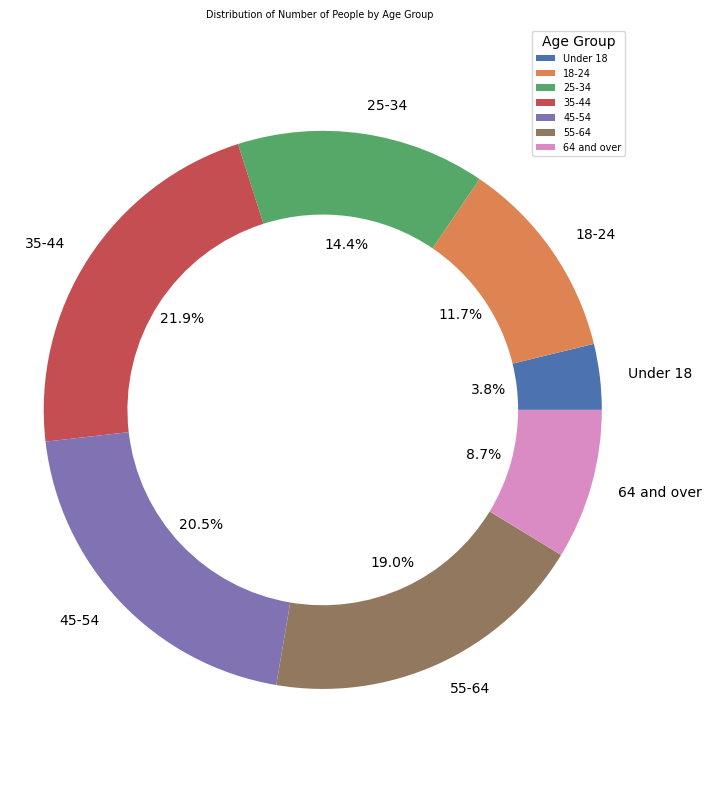

In [31]:
plt.figure(figsize=(8, 10))
sns.set_palette('deep')
plt.pie(df1['Number of People'], labels=df1['Categories'], autopct='%1.1f%%', wedgeprops={'width': 0.3})

# Draw a white circle at the center to create the donut chart
center_circle = plt.Circle((0, 0), 0.6, color='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Set aspect ratio to be equal so the pie will be circular
plt.axis('equal')

plt.legend(title='Age Group', loc='upper right', labels=df1['Categories'])

# Display the chart
plt.title('Distribution of Number of People by Age Group')
plt.show()